# 인공신경망 모델 만들기

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
from keras import optimizers
from tensorflow.keras.layers import Dropout
import time

final_data = pd.read_csv('/Users/seowon/Desktop/DataSceince/terminal_ver/original_classification_data.csv',engine='python')

def makemodel():
    model = Sequential()
    model.add(Dense(64, input_dim=35, activation='relu'))
#     model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
#     model.add(Dropout(0.5))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    return model


# 논문은 35개의 입력노드, 3개의 은닉층, 1개의 출력노드 --> 활성화함수: relu, 출력함수: sigmoid , 각 은닉층은 64개, 32개, 16개의 노드로 구성
# model = Sequential()
# model.add(Dense(64, input_dim=35, activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(16, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))

ann_model = makemodel()
ann_model2 = makemodel()
ann_model3 = makemodel()
ann_model4 = makemodel()
ann_model5 = makemodel()
ann_model6 = makemodel()
ann_model7 = makemodel()
ann_model8 = makemodel()

adam = optimizers.Adam(lr=0.001, decay=1e-6)
adam2 = optimizers.Adam(lr=0.01, decay=1e-6)
rmsprop = optimizers.RMSprop(lr=0.001)
sgd = optimizers.SGD(lr=0.001)
# model.compile(loss='mean_squared_error',optimizer=rmsprop ,metrics=['mse'])
ann_model.compile(loss='mse',optimizer=adam)
ann_model2.compile(loss='mse',optimizer=adam)
ann_model3.compile(loss='bce',optimizer=adam)
ann_model4.compile(loss='bce',optimizer=adam)

ann_model5.compile(loss='mse',optimizer=adam2)
ann_model6.compile(loss='mse',optimizer=adam2)
ann_model7.compile(loss='bce',optimizer=adam2)
ann_model8.compile(loss='bce',optimizer=adam2)

del final_data['Unnamed: 0']

# final_data.columns

x_data = final_data[['month_cut_1', 'month_cut_2', 'month_cut_3', 'month_cut_4', 'day_cut_1',
    'day_cut_2', 'day_cut_3', 'day_cut_4', 'day_cut_5', 'day_cut_6',
    'day_cut_7', 'day_cut_8', 'hour_cut_1', 'hour_cut_2', 'hour_cut_3',
    'hour_cut_4', 'hour_cut_5', 'hour_cut_6', 'hour_cut_7', 'hour_cut_8',
    'temp_range_1', 'temp_range_2', 'temp_range_3', 'temp_range_4',
    'temp_range_5', 'wind_range_1', 'wind_range_2', 'wind_range_3',
    'wind_range_4', 'wind_range_5', 'hmd_range_1', 'hmd_range_2',
    'hmd_range_3', 'hmd_range_4', 'hmd_range_5']]

y_data = final_data['fire accident']

# define the number of train, test data for make sequential train, test data
n_of_train = int(len(final_data) * 0.8)
# n_of_test = int(len(final_data) - n_of_train)

# split the train and test data by using keras
# x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, stratify=y_data, random_state=1004)

x_train = x_data[:n_of_train]
x_test = x_data[n_of_train:]
y_train = y_data[:n_of_train]
y_test = y_data[n_of_train:]

# history = model.fit(x_train, y_train, batch_size=15, epochs=200, validation_split=0.2)
start = time.time()
history = ann_model.fit(x_train, y_train, batch_size=60, epochs=200, validation_split=0.2)
end = time.time()
print("\n")

start2 = time.time()
history2 = ann_model2.fit(x_train, y_train, batch_size=64, epochs=200, validation_split=0.2)
end2 = time.time()
print('\n')

start3 = time.time()
history3 = ann_model3.fit(x_train, y_train, batch_size=60, epochs=200, validation_split=0.2)
end3 = time.time()
print('\n')

start4 = time.time()
history4 = ann_model4.fit(x_train, y_train, batch_size=64, epochs=200, validation_split=0.2)
end4 = time.time()


start5 = time.time()
history5 = ann_model5.fit(x_train, y_train, batch_size=60, epochs=200, validation_split=0.2)
end5 = time.time()

start6 = time.time()
history6 = ann_model6.fit(x_train, y_train, batch_size=64, epochs=200, validation_split=0.2)
end6 = time.time()

start7 = time.time()
history7 = ann_model7.fit(x_train, y_train, batch_size=60, epochs=200, validation_split=0.2)
end7 = time.time()

start8 = time.time()
history8 = ann_model8.fit(x_train, y_train, batch_size=64, epochs=200, validation_split=0.2)
end8 = time.time()


print("ann_model1 time taken: ", f"{end - start:.5f} sec")
print("ann_model2 time taken: ", f"{end2 - start2:.5f} sec")
print("ann_model3 time taken: ", f"{end3 - start3:.5f} sec")
print("ann_model4 time taken: ", f"{end4 - start4:.5f} sec")
print("ann_model5 time taken: ", f"{end5 - start5:.5f} sec")
print("ann_model6 time taken: ", f"{end6 - start6:.5f} sec")
print("ann_model7 time taken: ", f"{end7 - start7:.5f} sec")
print("ann_model8 time taken: ", f"{end8 - start8:.5f} sec")

y_predict_ann = pd.DataFrame(ann_model.predict(x_test))
y_predict_ann2 = pd.DataFrame(ann_model2.predict(x_test))
y_predict_ann3 = pd.DataFrame(ann_model3.predict(x_test))
y_predict_ann4 = pd.DataFrame(ann_model4.predict(x_test))
y_predict_ann5 = pd.DataFrame(ann_model5.predict(x_test))
y_predict_ann6 = pd.DataFrame(ann_model6.predict(x_test))
y_predict_ann7 = pd.DataFrame(ann_model7.predict(x_test))
y_predict_ann8 = pd.DataFrame(ann_model8.predict(x_test))

y_predict_ann.to_csv('/Users/seowon/Desktop/DataSceince/final_result_compare/ann(mse,adam,lr=0.001,60,200)_nodrop.csv')
y_predict_ann2.to_csv('/Users/seowon/Desktop/DataSceince/final_result_compare/ann(mse,adam,lr=0.001,64,200)_nodrop.csv')
y_predict_ann3.to_csv('/Users/seowon/Desktop/DataSceince/final_result_compare/ann(bce,adam,lr=0.001,60,200)_nodrop.csv')
y_predict_ann4.to_csv('/Users/seowon/Desktop/DataSceince/final_result_compare/ann(bce,adam,lr=0.001,64,200)_nodrop.csv')

y_predict_ann5.to_csv('/Users/seowon/Desktop/DataSceince/final_result_compare/ann(mse,adam2,lr=0.01,60,200)_nodrop.csv')
y_predict_ann6.to_csv('/Users/seowon/Desktop/DataSceince/final_result_compare/ann(mse,adam2,lr=0.01,64,200)_nodrop.csv')
y_predict_ann7.to_csv('/Users/seowon/Desktop/DataSceince/final_result_compare/ann(bce,adam2,lr=0.01,60,200)_nodrop.csv')
y_predict_ann8.to_csv('/Users/seowon/Desktop/DataSceince/final_result_compare/ann(bce,adam2,lr=0.01,64,200)_nodrop.csv')



# y_predict_ann.to_csv('/content/drive/MyDrive/Colab Notebooks/RAE/ann(mse,adam,lr=0.001,40,200).csv')
# y_predict_ann2.to_csv('/content/drive/MyDrive/Colab Notebooks/RAE/ann(mse,adam,lr=0.001,60,200).csv')
# y_predict_ann3.to_csv('/content/drive/MyDrive/Colab Notebooks/RAE/ann(bce,adam,lr=0.001,40,200).csv')
# y_predict_ann4.to_csv('/content/drive/MyDrive/Colab Notebooks/RAE/ann(bce,adam,lr=0.001,60,200).csv')



/Users/seowon/DataProject/keras_data/venv/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/200
1114/1114 [==============================] - 1s 1ms/step - loss: 0.2350 - val_loss: 0.2307
Epoch 2/200
1114/1114 [==============================] - 1s 973us/step - loss: 0.2327 - val_loss: 0.2307
Epoch 3/200
1114/1114 [==============================] - 1s 941us/step - loss: 0.2324 - val_loss: 0.2320
Epoch 4/200
1114/1114 [==============================] - 1s 1ms/step - loss: 0.2318 - val_loss: 0.2324
Epoch 5/200
1114/1114 [==============================] - 1s 1ms/step - loss: 0.2315 - val_loss: 0.2337
Epoch 6/200
1114/1114 [==============================] - 1s 1ms/step - loss: 0.2310 - val_loss: 0.2325
Epoch 7/200
1114/1114 [==============================] - 1s 1ms/step - loss: 0.2307 - val_loss: 0.2337
Epoch 8/200
1114/1114 [==============================] - 1s 1ms/step - loss: 0.2303 - val_loss: 0.2323
Epoch 9/200
1114/1114 [==============================] - 1s 971us/step - loss: 0.2300 - val_loss: 0.2357
Epoch 10/200
1114/1114 [==============================] - 1s 960us/

Epoch 79/200
1114/1114 [==============================] - 1s 874us/step - loss: 0.2210 - val_loss: 0.2418
Epoch 80/200
1114/1114 [==============================] - 1s 866us/step - loss: 0.2208 - val_loss: 0.2417
Epoch 81/200
1114/1114 [==============================] - 1s 998us/step - loss: 0.2209 - val_loss: 0.2414
Epoch 82/200
1114/1114 [==============================] - 1s 1ms/step - loss: 0.2207 - val_loss: 0.2412
Epoch 83/200
1114/1114 [==============================] - 1s 1ms/step - loss: 0.2207 - val_loss: 0.2398
Epoch 84/200
1114/1114 [==============================] - 1s 1ms/step - loss: 0.2207 - val_loss: 0.2407
Epoch 85/200
1114/1114 [==============================] - 1s 1ms/step - loss: 0.2207 - val_loss: 0.2397
Epoch 86/200
1114/1114 [==============================] - 1s 1ms/step - loss: 0.2206 - val_loss: 0.2406
Epoch 87/200
1114/1114 [==============================] - 1s 973us/step - loss: 0.2205 - val_loss: 0.2397
Epoch 88/200
1114/1114 [==============================] 

1114/1114 [==============================] - 1s 987us/step - loss: 0.2189 - val_loss: 0.2422
Epoch 157/200
1114/1114 [==============================] - 1s 1ms/step - loss: 0.2189 - val_loss: 0.2432
Epoch 158/200
1114/1114 [==============================] - 1s 999us/step - loss: 0.2189 - val_loss: 0.2431
Epoch 159/200
1114/1114 [==============================] - 1s 961us/step - loss: 0.2189 - val_loss: 0.2451
Epoch 160/200
1114/1114 [==============================] - 1s 949us/step - loss: 0.2188 - val_loss: 0.2406
Epoch 161/200
1114/1114 [==============================] - 1s 928us/step - loss: 0.2187 - val_loss: 0.2435
Epoch 162/200
1114/1114 [==============================] - 1s 896us/step - loss: 0.2188 - val_loss: 0.2420
Epoch 163/200
1114/1114 [==============================] - 1s 905us/step - loss: 0.2188 - val_loss: 0.2421
Epoch 164/200
1114/1114 [==============================] - 1s 864us/step - loss: 0.2188 - val_loss: 0.2418
Epoch 165/200
1114/1114 [============================

Epoch 34/200
1045/1045 [==============================] - 1s 1ms/step - loss: 0.2246 - val_loss: 0.2365
Epoch 35/200
1045/1045 [==============================] - 1s 947us/step - loss: 0.2244 - val_loss: 0.2366
Epoch 36/200
1045/1045 [==============================] - 1s 951us/step - loss: 0.2244 - val_loss: 0.2372
Epoch 37/200
1045/1045 [==============================] - 1s 889us/step - loss: 0.2242 - val_loss: 0.2361
Epoch 38/200
1045/1045 [==============================] - 1s 893us/step - loss: 0.2240 - val_loss: 0.2378
Epoch 39/200
1045/1045 [==============================] - 1s 904us/step - loss: 0.2241 - val_loss: 0.2383
Epoch 40/200
1045/1045 [==============================] - 1s 901us/step - loss: 0.2239 - val_loss: 0.2384
Epoch 41/200
1045/1045 [==============================] - 1s 901us/step - loss: 0.2239 - val_loss: 0.2385
Epoch 42/200
1045/1045 [==============================] - 1s 899us/step - loss: 0.2235 - val_loss: 0.2385
Epoch 43/200
1045/1045 [========================

1045/1045 [==============================] - 1s 1ms/step - loss: 0.2202 - val_loss: 0.2419
Epoch 112/200
1045/1045 [==============================] - 1s 955us/step - loss: 0.2202 - val_loss: 0.2432
Epoch 113/200
1045/1045 [==============================] - 1s 1ms/step - loss: 0.2201 - val_loss: 0.2416
Epoch 114/200
1045/1045 [==============================] - 1s 1ms/step - loss: 0.2202 - val_loss: 0.2428
Epoch 115/200
1045/1045 [==============================] - 1s 1ms/step - loss: 0.2201 - val_loss: 0.2398
Epoch 116/200
1045/1045 [==============================] - 1s 965us/step - loss: 0.2201 - val_loss: 0.2418
Epoch 117/200
1045/1045 [==============================] - 1s 983us/step - loss: 0.2200 - val_loss: 0.2414
Epoch 118/200
1045/1045 [==============================] - 1s 932us/step - loss: 0.2200 - val_loss: 0.2448
Epoch 119/200
1045/1045 [==============================] - 1s 885us/step - loss: 0.2200 - val_loss: 0.2418
Epoch 120/200
1045/1045 [==============================] - 

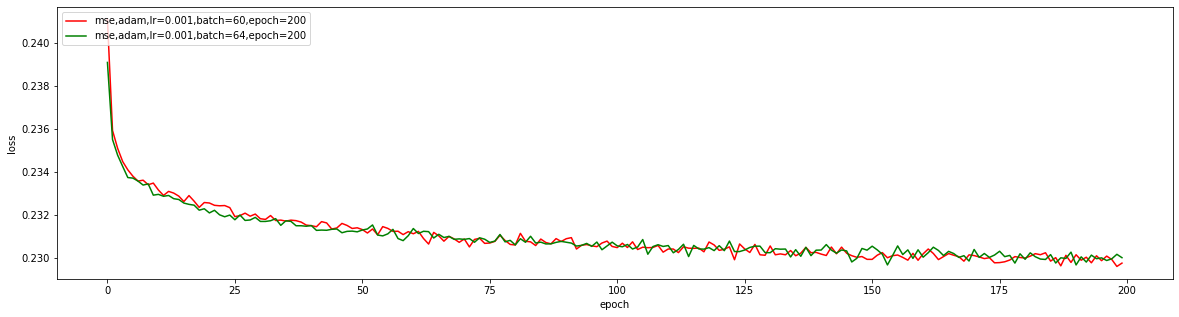

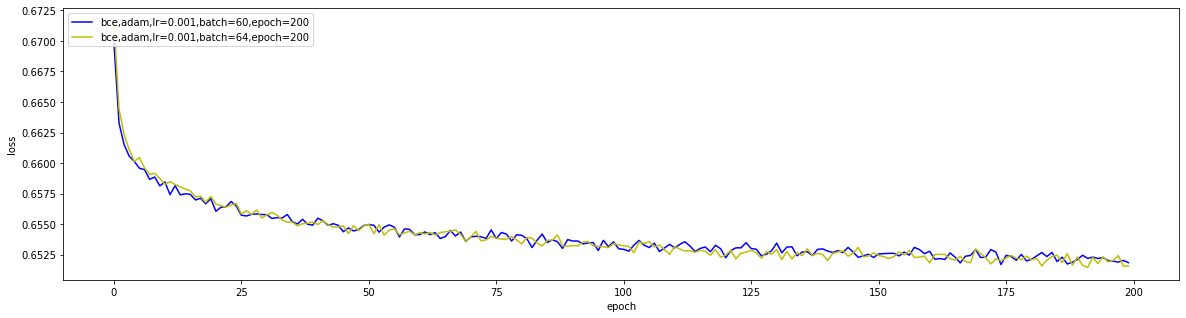

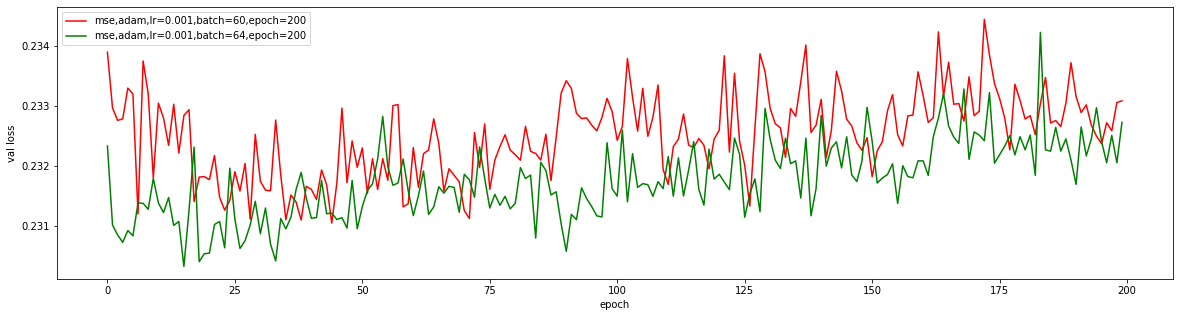

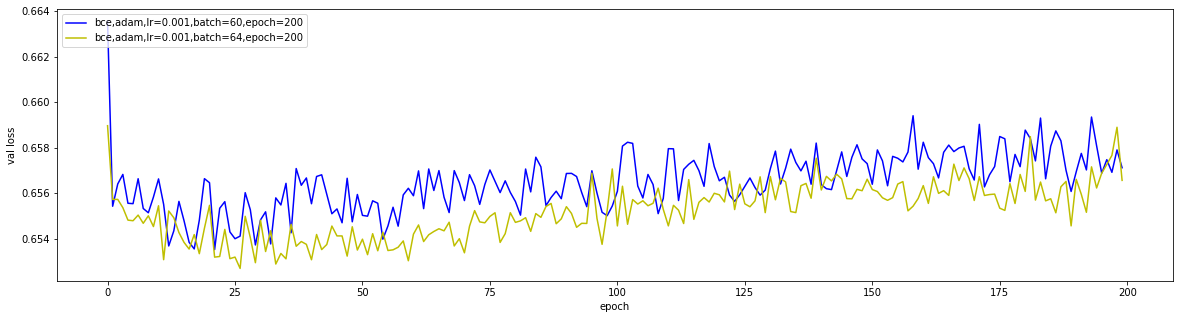

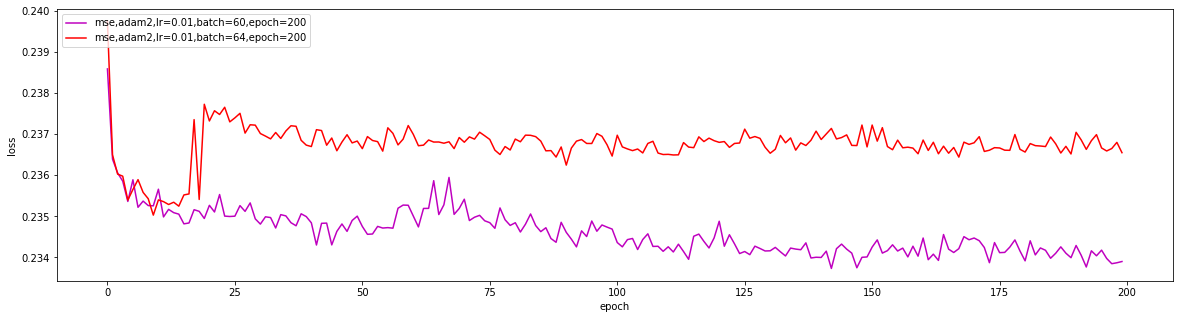

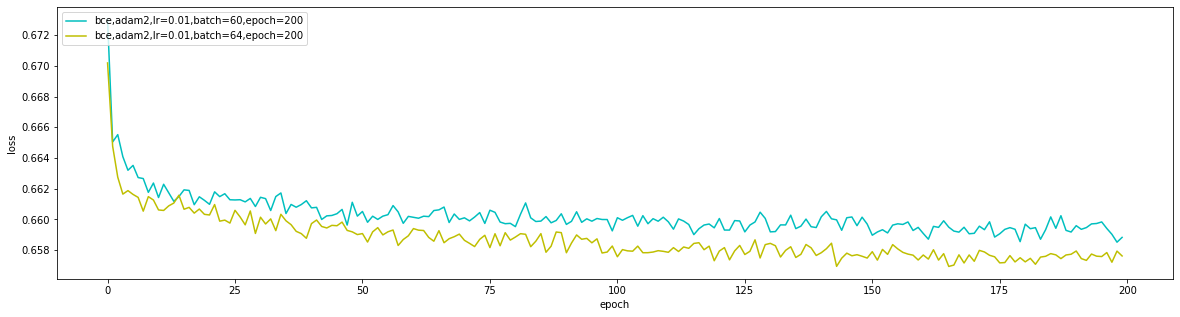

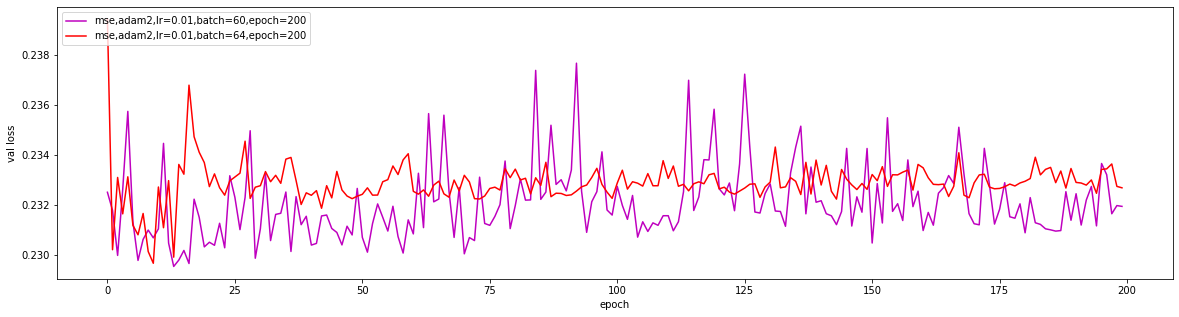

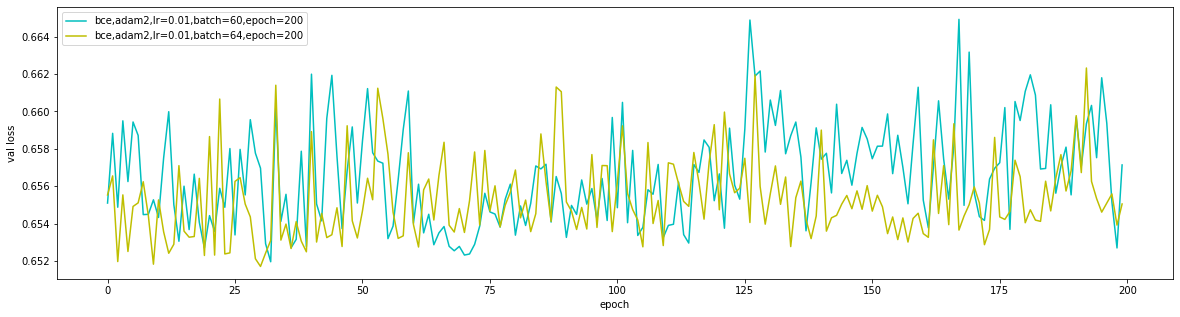

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [20, 5] # [width, height] (inches)
# fig, loss_ax, loss_ax2, loss_ax3, loss_ax4= plt.subplots()
# fig = plt.subplots()
# loss_ax = plt.subplots()

fig, loss_ax = plt.subplots()
fig, loss_ax2 = plt.subplots()
fig, loss_ax3 = plt.subplots()
fig, loss_ax4 = plt.subplots()
fig, loss_ax5 = plt.subplots()
fig, loss_ax6 = plt.subplots()
fig, loss_ax7 = plt.subplots()
fig, loss_ax8 = plt.subplots()
    
# loss_ax2 = plt.subplots()
# loss_ax3 = plt.subplots()
# loss_ax4 = plt.subplots()

# plt.subplot(221)
loss_ax.plot(history.history['loss'],'r',label='mse,adam,lr=0.001,batch=60,epoch=200')
loss_ax.plot(history2.history['loss'],'g',label='mse,adam,lr=0.001,batch=64,epoch=200')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

loss_ax2.plot(history3.history['loss'],'b',label='bce,adam,lr=0.001,batch=60,epoch=200')
loss_ax2.plot(history4.history['loss'],'y',label='bce,adam,lr=0.001,batch=64,epoch=200')
loss_ax2.set_xlabel('epoch')
loss_ax2.set_ylabel('loss')
loss_ax2.legend(loc='upper left')

# plt.subplot(222)
loss_ax3.plot(history.history['val_loss'],'r',label='mse,adam,lr=0.001,batch=60,epoch=200')
loss_ax3.plot(history2.history['val_loss'],'g',label='mse,adam,lr=0.001,batch=64,epoch=200')

loss_ax3.set_xlabel('epoch')
loss_ax3.set_ylabel('val loss')
loss_ax3.legend(loc='upper left')


loss_ax4.plot(history3.history['val_loss'],'b',label='bce,adam,lr=0.001,batch=60,epoch=200')
loss_ax4.plot(history4.history['val_loss'],'y',label='bce,adam,lr=0.001,batch=64,epoch=200')
loss_ax4.set_xlabel('epoch')
loss_ax4.set_ylabel('val loss')
loss_ax4.legend(loc='upper left')


# plt.subplot(223)
loss_ax5.plot(history5.history['loss'],'m',label='mse,adam2,lr=0.01,batch=60,epoch=200')
loss_ax5.plot(history6.history['loss'],'r',label='mse,adam2,lr=0.01,batch=64,epoch=200')

loss_ax5.set_xlabel('epoch')
loss_ax5.set_ylabel('loss')
loss_ax5.legend(loc='upper left')


loss_ax6.plot(history7.history['loss'],'c',label='bce,adam2,lr=0.01,batch=60,epoch=200')
loss_ax6.plot(history8.history['loss'],'y',label='bce,adam2,lr=0.01,batch=64,epoch=200')
loss_ax6.set_xlabel('epoch')
loss_ax6.set_ylabel('loss')
loss_ax6.legend(loc='upper left')

# plt.subplot(224)
loss_ax7.plot(history5.history['val_loss'],'m',label='mse,adam2,lr=0.01,batch=60,epoch=200')
loss_ax7.plot(history6.history['val_loss'],'r',label='mse,adam2,lr=0.01,batch=64,epoch=200')
loss_ax7.set_xlabel('epoch')
loss_ax7.set_ylabel('val loss')
loss_ax7.legend(loc='upper left')

loss_ax8.plot(history7.history['val_loss'],'c',label='bce,adam2,lr=0.01,batch=60,epoch=200')
loss_ax8.plot(history8.history['val_loss'],'y',label='bce,adam2,lr=0.01,batch=64,epoch=200')
loss_ax8.set_xlabel('epoch')
loss_ax8.set_ylabel('val loss')
loss_ax8.legend(loc='upper left')

plt.show()

# 가장 성능이 좋은 인공신경망 데이터 출력 & csv 파일로 변환

/Users/seowon/DataProject/keras_data/venv/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(
2021-08-07 17:00:49.502235: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-08-07 17:00:49.698218: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/250
1114/1114 [==============================] - 2s 1ms/step - loss: 0.2348 - val_loss: 0.2297
Epoch 2/250
1114/1114 [==============================] - 1s 899us/step - loss: 0.2336 - val_loss: 0.2345
Epoch 3/250
1114/1114 [==============================] - 1s 935us/step - loss: 0.2334 - val_loss: 0.2334
Epoch 4/250
1114/1114 [==============================] - 1s 972us/step - loss: 0.2333 - val_loss: 0.2331
Epoch 5/250
1114/1114 [==============================] - 1s 1ms/step - loss: 0.2328 - val_loss: 0.2308
Epoch 6/250
1114/1114 [==============================] - 1s 990us/step - loss: 0.2328 - val_loss: 0.2305
Epoch 7/250
1114/1114 [==============================] - 1s 911us/step - loss: 0.2323 - val_loss: 0.2325
Epoch 8/250
1114/1114 [==============================] - 1s 901us/step - loss: 0.2321 - val_loss: 0.2309
Epoch 9/250
1114/1114 [==============================] - 1s 892us/step - loss: 0.2319 - val_loss: 0.2335
Epoch 10/250
1114/1114 [==============================] - 1

1114/1114 [==============================] - 1s 991us/step - loss: 0.2245 - val_loss: 0.2348
Epoch 156/250
1114/1114 [==============================] - 1s 869us/step - loss: 0.2243 - val_loss: 0.2375
Epoch 157/250
1114/1114 [==============================] - 1s 864us/step - loss: 0.2242 - val_loss: 0.2366
Epoch 158/250
1114/1114 [==============================] - 1s 961us/step - loss: 0.2243 - val_loss: 0.2375
Epoch 159/250
1114/1114 [==============================] - 1s 950us/step - loss: 0.2245 - val_loss: 0.2399
Epoch 160/250
1114/1114 [==============================] - 1s 940us/step - loss: 0.2243 - val_loss: 0.2376
Epoch 161/250
1114/1114 [==============================] - 1s 938us/step - loss: 0.2241 - val_loss: 0.2383
Epoch 162/250
1114/1114 [==============================] - 1s 901us/step - loss: 0.2244 - val_loss: 0.2369
Epoch 163/250
1114/1114 [==============================] - 1s 861us/step - loss: 0.2242 - val_loss: 0.2396
Epoch 164/250
1114/1114 [==========================

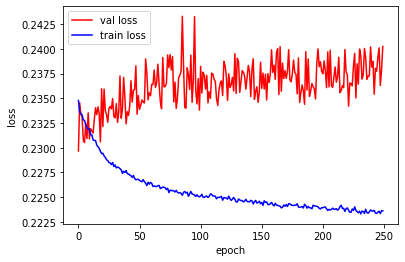

In [1]:
# 가장 성능이 좋은 인공신경망 데이터 출력 --> csv 파일로 변환

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
from keras import optimizers
from tensorflow.keras.layers import Dropout
import time

final_data = pd.read_csv('/Users/seowon/Desktop/DataSceince/terminal_ver/original_classification_data.csv',engine='python')

def makemodel():
    model = Sequential()
    model.add(Dense(64, input_dim=35, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    return model

adam2 = optimizers.Adam(lr=0.01, decay=1e-6)
ann_model9 = makemodel()
ann_model9.compile(loss='mse',optimizer=adam2)

del final_data['Unnamed: 0']

# final_data.columns

x_data = final_data[['month_cut_1', 'month_cut_2', 'month_cut_3', 'month_cut_4', 'day_cut_1',
    'day_cut_2', 'day_cut_3', 'day_cut_4', 'day_cut_5', 'day_cut_6',
    'day_cut_7', 'day_cut_8', 'hour_cut_1', 'hour_cut_2', 'hour_cut_3',
    'hour_cut_4', 'hour_cut_5', 'hour_cut_6', 'hour_cut_7', 'hour_cut_8',
    'temp_range_1', 'temp_range_2', 'temp_range_3', 'temp_range_4',
    'temp_range_5', 'wind_range_1', 'wind_range_2', 'wind_range_3',
    'wind_range_4', 'wind_range_5', 'hmd_range_1', 'hmd_range_2',
    'hmd_range_3', 'hmd_range_4', 'hmd_range_5']]

y_data = final_data['fire accident']

# define the number of train, test data for make sequential train, test data
n_of_train = int(len(final_data) * 0.8)
# n_of_test = int(len(final_data) - n_of_train)

# split the train and test data by using keras
# x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, stratify=y_data, random_state=1004)

x_train = x_data[:n_of_train]
x_test = x_data[n_of_train:]
y_train = y_data[:n_of_train]
y_test = y_data[n_of_train:]

# history = model.fit(x_train, y_train, batch_size=15, epochs=200, validation_split=0.2)
start9 = time.time()
history = ann_model9.fit(x_train, y_train, batch_size=60, epochs=250, validation_split=0.2)
end9 = time.time()

print("ann_model1 time taken: ", f"{end9 - start9:.5f} sec")


y_predict_ann9 = pd.DataFrame(ann_model9.predict(x_test))

# y_predict_ann9.to_csv('/Users/seowon/Desktop/DataSceince/terminal_ver/ann(mse,adam2,lr=0.01,60,200).csv')



# RAE 함수 선언 및 ann 모델 rae 값 출력하기

In [6]:
def rae(compare, simple, fire_accident):
    length = len(compare)
    upper_bound = 0
    lower_bound = 0
    for i in range(0, length):
        upper_bound += abs(compare[i]-fire_accident[i])
        lower_bound += abs(simple[i] - fire_accident[i])
    rae_value = upper_bound / lower_bound

    return rae_value

# ann9 = pd.read_csv('/Users/seowon/Desktop/DataSceince/terminal_ver/ann(mse,adam2,lr=0.01,60,200).csv',engine='python')
simple = pd.read_csv('/Users/seowon/Desktop/DataSceince/terminal_ver/simple_percentage.csv',engine='python')

ann1 = pd.read_csv('/Users/seowon/Desktop/DataSceince/final_result_compare/ann(mse,adam,lr=0.001,60,200)_nodrop.csv')
ann2 = pd.read_csv('/Users/seowon/Desktop/DataSceince/final_result_compare/ann(mse,adam,lr=0.001,64,200)_nodrop.csv')
ann3 = pd.read_csv('/Users/seowon/Desktop/DataSceince/final_result_compare/ann(bce,adam,lr=0.001,60,200)_nodrop.csv')
ann4 = pd.read_csv('/Users/seowon/Desktop/DataSceince/final_result_compare/ann(bce,adam,lr=0.001,64,200)_nodrop.csv')

ann5 = pd.read_csv('/Users/seowon/Desktop/DataSceince/final_result_compare/ann(mse,adam2,lr=0.01,60,200)_nodrop.csv')
ann6 = pd.read_csv('/Users/seowon/Desktop/DataSceince/final_result_compare/ann(mse,adam2,lr=0.01,64,200)_nodrop.csv')
ann7 = pd.read_csv('/Users/seowon/Desktop/DataSceince/final_result_compare/ann(bce,adam2,lr=0.01,60,200)_nodrop.csv')
ann8 = pd.read_csv('/Users/seowon/Desktop/DataSceince/final_result_compare/ann(bce,adam2,lr=0.01,64,200)_nodrop.csv')


del ann1['Unnamed: 0']
del ann2['Unnamed: 0']
del ann3['Unnamed: 0']
del ann4['Unnamed: 0']
del ann5['Unnamed: 0']
del ann6['Unnamed: 0']
del ann7['Unnamed: 0']
del ann8['Unnamed: 0']

ann1_per = ann1['0'].to_numpy()
ann2_per = ann2['0'].to_numpy()
ann3_per = ann3['0'].to_numpy()
ann4_per = ann4['0'].to_numpy()
ann5_per = ann5['0'].to_numpy()
ann6_per = ann6['0'].to_numpy()
ann7_per = ann7['0'].to_numpy()
ann8_per = ann8['0'].to_numpy()

length = len(ann2)

n_of_test_simple = len(simple)-length
simple_test = simple[n_of_test_simple:]

simple_fire = simple_test['fire accident'].to_numpy()
simple_per = simple_test['simple'].to_numpy()

print("ANN RAE mse,adam,0.001,60,200_nodrop: ",rae(ann1_per, simple_per, simple_fire))
print("ANN RAE mse,adam,0.001,64,200_nodrop: ",rae(ann2_per, simple_per, simple_fire))
print("ANN RAE bce,adam,0.001,60,200_nodrop: ",rae(ann3_per, simple_per, simple_fire))
print("ANN RAE bce,adam,0.001,64,200_nodrop: ",rae(ann4_per, simple_per, simple_fire))
print("\n")
print("ANN RAE mse,adam2,0.01,60,200_nodrop: ",rae(ann5_per, simple_per, simple_fire))
print("ANN RAE mse,adam2,0.01,64,200_nodrop: ",rae(ann6_per, simple_per, simple_fire))
print("ANN RAE bce,adam2,0.01,60,200_nodrop: ",rae(ann7_per, simple_per, simple_fire))
print("ANN RAE bce,adam2,0.01,64,200_nodrop: ",rae(ann8_per, simple_per, simple_fire))

ANN RAE mse,adam,0.001,60,200:  0.9837850368603099
ANN RAE mse,adam,0.001,64,200:  0.983019418538822
ANN RAE bce,adam,0.001,60,200:  0.9828804459367734
ANN RAE bce,adam,0.001,64,200:  0.9835389806938046


ANN RAE mse,adam2,0.01,60,200:  0.983108780897824
ANN RAE mse,adam2,0.01,64,200:  0.9963897478383178
ANN RAE bce,adam2,0.01,60,200:  0.9907998425250086
ANN RAE bce,adam2,0.01,64,200:  0.989782861049645


# Graphviz (의사결정트리, 랜덤포레스트 시각화 모듈), pydotplus 설치

In [19]:
!pip install graphviz
!pip install pydotplus

# 다중선형회귀, 의사결정트리, 랜덤포레스트 모델 만들기

In [6]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import graphviz
from graphviz import Source
from sklearn.model_selection import train_test_split
import pydot
import pydotplus
import os
from IPython.display import Image
import time

# os.environ["PATH"] += os.pathsep + '/Users/seowon/Desktop'
# mlr = LinearRegression()
# mlr.fit(x_train, y_train)

# y_predict = mlr.predict(x_test)

for_decision = pd.read_csv('/Users/seowon/Desktop/DataSceince/terminal_ver/for_decision.csv', engine='python')

del for_decision['Unnamed: 0']


x_data_dec = for_decision[['month',	'day' ,'hour','temp', 'hmd' ,'wind']]
y_data_dec = for_decision['fire accident']

# 데이터 순차적 접근하기 위한 처리
n_of_train = int(len(for_decision) * 0.8)
x_train_dec = x_data_dec[:n_of_train]
x_test_dec = x_data_dec[n_of_train:]
y_train_dec = y_data_dec[:n_of_train]
y_test_dec = y_data_dec[n_of_train:]


# 랜덤포레스트 모델

start_rand1 = time.time()
randforest_reg = RandomForestRegressor(n_estimators=650, max_depth=7)
randforest_reg.fit(x_train_dec, y_train_dec)
end_rand1 = time.time()

start_rand2 = time.time()
randforest_reg2 = RandomForestRegressor(n_estimators=660, max_depth=7)
randforest_reg2.fit(x_train_dec, y_train_dec)
end_rand2 = time.time()

start_rand3 = time.time()
randforest_reg3 = RandomForestRegressor(n_estimators=680, max_depth=7)
randforest_reg3.fit(x_train_dec, y_train_dec)
end_rand3 = time.time()


y_predict_rand = randforest_reg.predict(x_test_dec)
y_predict_rand2 = randforest_reg2.predict(x_test_dec)
y_predict_rand3 = randforest_reg3.predict(x_test_dec)

y_predict_rand = pd.DataFrame(y_predict_rand)
y_predict_rand2 = pd.DataFrame(y_predict_rand2)
y_predict_rand3 = pd.DataFrame(y_predict_rand3)

y_predict_rand.to_csv('/Users/seowon/Desktop/DataSceince/terminal_ver/rand_n=650,depth=7.csv')
y_predict_rand2.to_csv('/Users/seowon/Desktop/DataSceince/terminal_ver/rand_n=660,depth=7.csv')
y_predict_rand3.to_csv('/Users/seowon/Desktop/DataSceince/terminal_ver/rand_n=680,depth=7.csv')



# 의사결정트리 모델
# 데이터 랜덤으로 섞기
# x_train_dec, x_test_dec, y_train_dec, y_test_dec = train_test_split(x_data_dec, y_data_dec, test_size=0.2, stratify=y_data_dec, random_state=1004) #no split data


# different depth for comparing result // nonclassification.version

start_dec1 = time.time()
tree_reg = DecisionTreeRegressor(max_depth=4)
tree_reg.fit(x_train_dec,y_train_dec)
end_dec1 = time.time()

start_dec2 = time.time()
tree_reg2 = DecisionTreeRegressor(max_depth=7)
tree_reg2.fit(x_train_dec,y_train_dec)
end_dec2 = time.time()

start_dec3 = time.time()
tree_reg3 = DecisionTreeRegressor(max_depth=9)
tree_reg3.fit(x_train_dec,y_train_dec)
end_dec3 = time.time()

y_predict_dec = tree_reg.predict(x_test_dec)
y_predict_dec2 = tree_reg2.predict(x_test_dec)
y_predict_dec3 = tree_reg3.predict(x_test_dec)

# # different depth for comparing result // classification.version
# tree_reg_class = DecisionTreeRegressor(max_depth=2)
# tree_reg2_class = DecisionTreeRegressor(max_depth=3)
# tree_reg3_class = DecisionTreeRegressor(max_depth=5)

# tree_reg_class.fit(x_train,y_train)
# tree_reg2_class.fit(x_train,y_train)
# tree_reg3_class.fit(x_train,y_train)

# y_predict_dec_class = tree_reg_class.predict(x_test)
# y_predict_dec2_class = tree_reg2_class.predict(x_test)
# y_predict_dec3_class = tree_reg3_class.predict(x_test)

# # Nonclassified predicted data
y_predict_dec = pd.DataFrame(y_predict_dec)
y_predict_dec2 = pd.DataFrame(y_predict_dec2)
y_predict_dec3 = pd.DataFrame(y_predict_dec3)

y_predict_dec.to_csv('/Users/seowon/Desktop/DataSceince/terminal_ver/dec_depth=4.csv')
y_predict_dec2.to_csv('/Users/seowon/Desktop/DataSceince/terminal_ver/dec_depth=7.csv')
y_predict_dec3.to_csv('/Users/seowon/Desktop/DataSceince/terminal_ver/dec_depth=9.csv')


print("rand1 time taken: ", f"{end_rand1 - start_rand1:.5f} sec")
print("rand2 time taken: ", f"{end_rand2 - start_rand2:.5f} sec")
print("rand3 time taken: ", f"{end_rand3 - start_rand3:.5f} sec")
print('\n')
print("dec1 time taken: ", f"{end_dec1 - start_dec1:.5f} sec")
print("dec2 time taken: ", f"{end_dec2 - start_dec2:.5f} sec")
print("dec3 time taken: ", f"{end_dec3 - start_dec3:.5f} sec")

# y_predict_dec.to_csv('/content/drive/MyDrive/Colab Notebooks/RAE/decision_tree1.csv')
# y_predict_dec2.to_csv('/content/drive/MyDrive/Colab Notebooks/RAE/decision_tree2.csv')
# y_predict_dec3.to_csv('/content/drive/MyDrive/Colab Notebooks/RAE/decision_tree3.csv')

# # classified predicted data
# y_predict_dec_class = pd.DataFrame(y_predict_dec_class)
# y_predict_dec2_class = pd.DataFrame(y_predict_dec2_class)
# y_predict_dec3_class = pd.DataFrame(y_predict_dec3_class)

# y_predict_dec_class.to_csv('/content/drive/MyDrive/Colab Notebooks/RAE/decision_tree_class1.csv')
# y_predict_dec2_class.to_csv('/content/drive/MyDrive/Colab Notebooks/RAE/decision_tree_class2.csv')
# y_predict_dec3_class.to_csv('/content/drive/MyDrive/Colab Notebooks/RAE/decision_tree_class3.csv')


rand1 time taken:  57.96459 sec
rand2 time taken:  60.02797 sec
rand3 time taken:  60.86189 sec


dec1 time taken:  0.07072 sec
dec2 time taken:  0.11599 sec
dec3 time taken:  0.16235 sec


# 인공신경망, 다중선형, 의사결정트리, 랜덤포레스트 모델들 RAE 값 출력 및 비교

In [8]:
import pandas as pd
import tensorflow as tf

def rae(compare, simple, fire_accident):
    length = len(compare)
    upper_bound = 0
    lower_bound = 0
    for i in range(0, length):
        upper_bound += abs(compare[i]-fire_accident[i])
        lower_bound += abs(simple[i] - fire_accident[i])
    rae_value = upper_bound / lower_bound

    return rae_value



simple = pd.read_csv('/Users/seowon/Desktop/DataSceince/terminal_ver/simple_percentage.csv',engine='python')

ann = pd.read_csv('/Users/seowon/Desktop/DataSceince/terminal_ver/ann(bce,adam2,lr=0.01,32,250).csv',engine='python')
ann2 = pd.read_csv('/Users/seowon/Desktop/DataSceince/terminal_ver/ann(bce,adam2,lr=0.01,64,250).csv',engine='python')
ann3 = pd.read_csv('/Users/seowon/Desktop/DataSceince/terminal_ver/ann(bce,adam2,lr=0.01,128,250).csv',engine='python')
ann4 = pd.read_csv('/Users/seowon/Desktop/DataSceince/terminal_ver/ann(bce,adam2,lr=0.01,256,250).csv',engine='python')
ann5 = pd.read_csv('/Users/seowon/Desktop/DataSceince/terminal_ver/ann(bce,adam2,lr=0.01,60,200).csv',engine='python')
ann6 = pd.read_csv('/Users/seowon/Desktop/DataSceince/terminal_ver/ann(bce,adam2,lr=0.01,60,300).csv',engine='python')
ann7 = pd.read_csv('/Users/seowon/Desktop/DataSceince/terminal_ver/ann(bce,adam2,lr=0.01,60,350).csv',engine='python')
ann8 = pd.read_csv('/Users/seowon/Desktop/DataSceince/terminal_ver/ann(bce,adam2,lr=0.01,60,400).csv',engine='python')

dec1 = pd.read_csv('/Users/seowon/Desktop/DataSceince/terminal_ver/dec_depth=4.csv',engine='python')
dec2 = pd.read_csv('/Users/seowon/Desktop/DataSceince/terminal_ver/dec_depth=7.csv', engine='python')
dec3 = pd.read_csv('/Users/seowon/Desktop/DataSceince/terminal_ver/dec_depth=9.csv', engine='python')
#     dec_class1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/RAE/decision_tree_class1.csv', engine='python')
#     dec_class2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/RAE/decision_tree_class2.csv', engine='python')
#     dec_class3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/RAE/decision_tree_class3.csv', engine='python')

rand1 = pd.read_csv('/Users/seowon/Desktop/DataSceince/terminal_ver/rand_n=650,depth=7.csv',engine='python')
rand2 = pd.read_csv('/Users/seowon/Desktop/DataSceince/terminal_ver/rand_n=660,depth=7.csv',engine='python')
rand3 = pd.read_csv('/Users/seowon/Desktop/DataSceince/terminal_ver/rand_n=680,depth=7.csv',engine='python')

del ann['Unnamed: 0']
del ann2['Unnamed: 0']
del ann3['Unnamed: 0']
del ann4['Unnamed: 0']
del ann5['Unnamed: 0']
del ann6['Unnamed: 0']
del ann7['Unnamed: 0']
del ann8['Unnamed: 0']

del dec1['Unnamed: 0']
del dec2['Unnamed: 0']
del dec3['Unnamed: 0']

# del dec_class1['Unnamed: 0']
# del dec_class2['Unnamed: 0']
# del dec_class3['Unnamed: 0']

del rand1['Unnamed: 0']
del rand2['Unnamed: 0']
del rand3['Unnamed: 0']

# print(ann.loc[3])
# cal = abs(ann.loc[3,'ann_per']-simple.loc[3,'fire accident'])
# print(cal)

length = len(ann)

n_of_test_simple = len(simple)-length
simple_test = simple[n_of_test_simple:]

simple_fire = simple_test['fire accident'].to_numpy()
simple_per = simple_test['simple'].to_numpy()

# ann_per = ann['ann_per'].to_numpy()
ann_per = ann['0'].to_numpy()
ann2_per = ann2['0'].to_numpy()
ann3_per = ann3['0'].to_numpy()
ann4_per = ann4['0'].to_numpy()
ann5_per = ann5['0'].to_numpy()
ann6_per = ann6['0'].to_numpy()
ann7_per = ann7['0'].to_numpy()
ann8_per = ann8['0'].to_numpy()


dec1_per = dec1['0'].to_numpy()
dec2_per = dec2['0'].to_numpy()
dec3_per = dec3['0'].to_numpy()

#     dec_class1_per = dec_class1['0'].to_numpy()
#     dec_class2_per = dec_class2['0'].to_numpy()
#     dec_class3_per = dec_class3['0'].to_numpy()

rand1_per = rand1['0'].to_numpy()
rand2_per = rand2['0'].to_numpy()
rand3_per = rand3['0'].to_numpy()

print("ANN RAE bce,adam2,0.01,32,250: ",rae(ann_per, simple_per, simple_fire))
print("ANN RAE bce,adam2,0.01,64,250: ",rae(ann2_per, simple_per, simple_fire))
print("ANN RAE bce,adam2,0.01,128,250: ",rae(ann3_per, simple_per, simple_fire))
print("ANN RAE bce,adam2,0.01,256,250: ",rae(ann4_per, simple_per, simple_fire))
print("ANN RAE bce,adam2,0.01,60,200: ",rae(ann5_per, simple_per, simple_fire))
print("ANN RAE bce,adam2,0.01,60,300: ",rae(ann6_per, simple_per, simple_fire))
print("ANN RAE bce,adam2,0.01,60,350: ",rae(ann7_per, simple_per, simple_fire))
print("ANN RAE bce,adam2,0.01,60,400: ",rae(ann8_per, simple_per, simple_fire))
print("\n")
# print("Decision RAE depth=4: ", rae(dec1_per, simple_per, simple_fire))
# print("Decision RAE depth=7: ", rae(dec2_per, simple_per, simple_fire))
# print("Decision RAE depth=9: ", rae(dec3_per, simple_per, simple_fire))
# print('\n')
#     print("Decision RAE value_class: ", rae(dec_class1_per, simple_per, simple_fire))
#     print("Decision RAE value_class2: ", rae(dec_class2_per, simple_per, simple_fire))
#     print("Decision RAE value_class3: ", rae(dec_class3_per, simple_per, simple_fire))
#     print('\n')
print("Random Forest RAE n=650,depth=7: ",rae(rand1_per, simple_per, simple_fire))
print("Random Forest RAE n=660,depth=7: ",rae(rand2_per, simple_per, simple_fire))
print("Random Forest RAE n=680,depth=7: ",rae(rand3_per, simple_per, simple_fire))


ANN RAE bce,adam2,0.01,32,250:  0.9748166711649401
ANN RAE bce,adam2,0.01,64,250:  0.987684944701709
ANN RAE bce,adam2,0.01,128,250:  0.9804487754241951
ANN RAE bce,adam2,0.01,256,250:  0.9791832804354653
ANN RAE bce,adam2,0.01,60,200:  0.9728859906774757
ANN RAE bce,adam2,0.01,60,300:  0.9832605127016792
ANN RAE bce,adam2,0.01,60,350:  0.9758781259208333
ANN RAE bce,adam2,0.01,60,400:  0.9830041680853208


Random Forest RAE n=650,depth=7:  0.974243990302875
Random Forest RAE n=660,depth=7:  0.9741315997385449
Random Forest RAE n=680,depth=7:  0.9742499650924282
